### Import Library

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras import datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix , classification_report

### Load CIFAR dataset

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
y_train = y_train.ravel() # flatten y_train

In [3]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

### Plot sample image

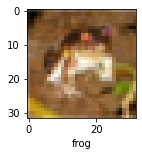

In [4]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    
plot_sample(x_train, y_train, 0)

### Normalize the training data

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## ANN Model

In [6]:
model_ann = Sequential()
model_ann.add(Flatten(input_shape=(32,32,3)))
model_ann.add(Dense(3000, activation='tanh'))
model_ann.add(Dense(1000, activation='tanh'))
model_ann.add(Dense(10, activation='softmax'))

model_ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 100s 63ms/step - loss: 1.9191 - accuracy: 0.3220
Epoch 2/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.7062 - accuracy: 0.3925
Epoch 3/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.6232 - accuracy: 0.4243
Epoch 4/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.5638 - accuracy: 0.4479
Epoch 5/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.5239 - accuracy: 0.4608


In [7]:
model_ann.fit(x_test, y_test)

313/313 [==============================] - 20s 62ms/step - loss: 1.5292 - accuracy: 0.4594


In [8]:
y_pred = model_ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.39      0.75      0.51      1000
           1       0.62      0.57      0.59      1000
           2       0.33      0.43      0.37      1000
           3       0.36      0.33      0.34      1000
           4       0.54      0.17      0.26      1000
           5       0.44      0.37      0.40      1000
           6       0.43      0.69      0.53      1000
           7       0.73      0.36      0.48      1000
           8       0.60      0.54      0.57      1000
           9       0.62      0.47      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



## CNN Model

In [9]:
model_cnn = Sequential()
model_cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(MaxPooling2D((2, 2)))

model_cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))

model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

model_cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4773 - accuracy: 0.4704
Epoch 2/5
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1290 - accuracy: 0.6035
Epoch 3/5
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9950 - accuracy: 0.6519
Epoch 4/5
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9036 - accuracy: 0.68360s - loss: 0.9037 - accu
Epoch 5/5
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8392 - accuracy: 0.7069


In [10]:
model_cnn.fit(x_test, y_test)

313/313 [==============================] - 11s 34ms/step - loss: 0.9373 - accuracy: 0.6781


In [11]:
y_pred = model_cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.73      0.77      1000
           1       0.89      0.79      0.84      1000
           2       0.65      0.58      0.61      1000
           3       0.54      0.60      0.57      1000
           4       0.62      0.74      0.68      1000
           5       0.68      0.59      0.63      1000
           6       0.80      0.80      0.80      1000
           7       0.73      0.81      0.77      1000
           8       0.86      0.80      0.83      1000
           9       0.77      0.86      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000

